## 4. 设计并训练K-Means算法对图片进行聚类。

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

/home/vbuo/.linuxbrew/Cellar/python3/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# 计算两个向量之间的距离
def euclDistance(vector1, vector2):
    # vector1,vector2是向量才能相加减,python中一维向量用矩阵表示
    return sqrt(sum(power(vector2 - vector1, 2)))

In [3]:
# 选择原始簇中心
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape  #返回矩阵的行和列
    centroids = zeros((k, dim))  #centroids存储每个簇心的坐标
    for i in range(k):
        index = int(random.uniform(0, numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids

In [4]:
# k-means cluster
def kmeans(dataSet, k):  #dataSet=[[1 2][3 4][5 6]...]
    numSamples = dataSet.shape[0]
    # clusterAssment第一列存储对应样本点属于哪一个簇,第二列是该点到簇中心的距离平方和
    clusterAssment = mat(zeros((numSamples, 2)))
    clusterChanged = True

    # step 1:找出初始点
    centroids = initCentroids(dataSet, k)
    while clusterChanged:
        # clusterChanged标记簇中心是否改变
        clusterChanged = False

        # step 2:对于每个样本点,计算它与每个簇之间的距离,距离最小划分为它归属的簇
        for i in range(numSamples):
            minDist = inf  #inf是numpy中的一个常量,表示无穷大
            minIndex = 0

            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist = distance
                    minIndex = j

            # step 3:判断该样本点所属的簇是否改变,若改变记下它与簇中心之间的距离
            if clusterAssment[i,
                              0] != minIndex:  #clusterAssment[i, 0]是原先该样本所属的簇中心,minIndex是新样本点所属的簇中心
                clusterChanged = True  #簇中心已发生改变
                clusterAssment[i, :] = minIndex, minDist**2

        # step 4:更新簇中心
        for j in range(k):
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[
                0]]  #clusterAssment[:,0].A将clusterAssment[:,0]矩阵转换成数组
            # nonzero(a)函数将对矩阵a的所有非零元素,分别从两个维度(行和列)看,非0元素对应的行坐标放在一个列表中,对应的列坐标放在一个列表中,然后一起返回!
            # clusterAssment[:, 0].A ==j将对应的元素编程True和False了,所以nonzero(clusterAssment[:, 0].A == j)[0]最终将该簇的点
            centroids[j, :] = mean(
                pointsInCluster, axis=0)  #选项axis=0表示沿矩阵的列方向进行均值计算

    print('Congratulations, cluster complete!')
    return centroids, clusterAssment

In [5]:
# show your cluster only available with 2-D data
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print(
            "Sorry! I can not draw because the dimension of your data is not 2!"
        )
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large!")
        return 1

    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)
    plt.show()

In [6]:
train_num = int(input('请输入要参与聚类的图片数量(0~55000)：'))
## step 1: load data
print("step 1: load data...")
mnist = input_data.read_data_sets('../m-L-0/data/fashion', one_hot=True)
train_images = mnist.train.images
# print(train_images)
dataMat = TSNE().fit_transform(train_images[:train_num])

请输入要参与聚类的图片数量(0~55000)：1000
step 1: load data...
Extracting ../m-L-0/data/fashion/train-images-idx3-ubyte.gz
Extracting ../m-L-0/data/fashion/train-labels-idx1-ubyte.gz
Extracting ../m-L-0/data/fashion/t10k-images-idx3-ubyte.gz
Extracting ../m-L-0/data/fashion/t10k-labels-idx1-ubyte.gz


In [7]:
# step 2: clustering...
print("step 2: clustering...")
k = 10
centroids, clusterAssment = kmeans(dataMat, k)
print(centroids)
print(clusterAssment)

step 2: clustering...
Congratulations, cluster complete!
[[ -7.79217434 -29.7522049 ]
 [  0.75725698  33.99850082]
 [-27.56761551  -2.40484595]
 [ 23.19097328 -14.7977438 ]
 [ -1.97402835 -12.47327042]
 [ 11.18908405  -1.4575094 ]
 [-12.65474129  30.93631744]
 [ 33.60665512   6.43542147]
 [ -6.21284437  18.3930912 ]
 [-25.19878006  23.93130493]]
[[   0.           72.93049614]
 [   5.          198.60522866]
 [   6.           34.12945231]
 ..., 
 [   5.          150.16850773]
 [   1.           49.70790446]
 [   3.          215.60648968]]


step 3: show the result...


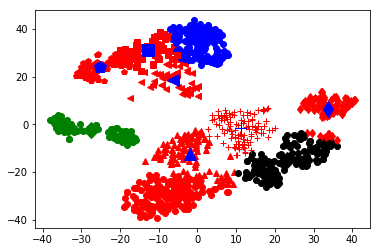

In [8]:
# step 3: show the result
print("step 3: show the result...")
showCluster(dataMat, k, centroids, clusterAssment)